In [1]:
#check python version
from platform import python_version
python_version()

'3.10.7'

In [2]:
#import the modules and packages
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from datetime import datetime
from dateutil import relativedelta

In [48]:
#Combine all .csv files into one .csv file

#read the path
file_path = "/Users/thanawitouioutai/IFN704/Dataset_after_35pages_more_than_10_revisions/"
#list all the files from the directory
file_list = os.listdir(file_path)
#file_list

#Combining multiple files with the similar table structure using pandas.concat()
df_concat = pd.concat([pd.read_csv(file_path+file) for file in file_list ], ignore_index=True)
df_concat

,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
0,36395541,1163 in Norway,501746617,2012-07-11T16:53:00Z,719157,Oceanh
1,36395541,1163 in Norway,508027004,2012-08-18T19:54:13Z,508734,Hmains
2,36395541,1163 in Norway,531466940,2013-01-05T16:35:35Z,6655086,Dawynn
3,36395541,1163 in Norway,531520594,2013-01-05T22:37:54Z,1368779,PamD
4,36395541,1163 in Norway,640868107,2015-01-03T23:41:40Z,1951353,Waacstats
...,...,...,...,...,...,...
4757100,2913415,Epilaeliocattleya,811933521,2017-11-24T21:52:39Z,245519,Choess
4757101,2913415,Epilaeliocattleya,831407068,2018-03-20T12:58:31Z,28901961,Tom.Bot
4757102,2913415,Epilaeliocattleya,889115919,2019-03-23T16:03:34Z,14423536,Plantdrew
4757103,2913415,Epilaeliocattleya,970964437,2020-08-03T12:00:49Z,33957014,Godstime Elijah


From the result of "df_concat", we have already check that the "df_concat" include our all .csv files by checking the first and last file from "file_list".
* file_list[0:9]
* file_list[-9:]

In [49]:
# check missing values in each columns
df_concat.isna().sum() 

Page ID                   0
Page title               11
Revision ID               0
Timestamp                 0
Contributor ID          148
Contributor name    1424079
dtype: int64

So, we remove the row that contain missing values

In [50]:
# load bots list
bot_list = pd.read_csv('/Users/thanawitouioutai/IFN704/Code_project_analysis/Bots_list.csv')
bot_list = bot_list['Bot name'].values.tolist()
len(bot_list)

1138

In [51]:
# see bot row before preprocessing
df_concat[df_concat["Contributor name"].isin(bot_list)]

,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
20,36395544,Tim Roller's Whitetail Journey,641389108,2015-01-07T10:35:58Z,7328338,Yobot
33,36395547,Tiruttangal,737170216,2016-09-01T04:21:12Z,25180159,BD2412bot
35,36395547,Tiruttangal,793534014,2017-08-02T10:41:36Z,1215485,Cydebot
39,36395547,Tiruttangal,984474969,2020-10-20T08:07:24Z,35936988,JJMC89 bot III
165,36395576,Carbon Recycling International,507437354,2012-08-14T21:18:12Z,9021902,FrescoBot
...,...,...,...,...,...,...
4757097,2913415,Epilaeliocattleya,532071601,2013-01-09T01:32:01Z,6569922,Addbot
4757098,2913415,Epilaeliocattleya,544161802,2013-03-14T18:45:38Z,6569922,Addbot
4757099,2913415,Epilaeliocattleya,756553196,2016-12-25T03:04:04Z,27015025,InternetArchiveBot
4757101,2913415,Epilaeliocattleya,831407068,2018-03-20T12:58:31Z,28901961,Tom.Bot


In [52]:
#pre-processing the dataset

# Drop rows which contain any NaN value. This is becuase these people who were contributed anonymously
df_concat = df_concat.dropna(how = "any", subset = ["Contributor name"])
df_concat = df_concat.dropna(how = "any", subset = ["Page title"])

# Drop rows which the contributor name is bots
df_concat = df_concat[~df_concat["Contributor name"].isin(bot_list)]

# replace T with space and remove Z in Timestamp
for i in range(len(df_concat)):
    df_concat.iloc[i,3] = df_concat.iloc[i,3].replace("T", " ").strip("Z")

# convert Timestamp column to be datetime type
df_concat["Timestamp"] = pd.to_datetime(df_concat["Timestamp"])





In [53]:
# see row affter preprocessing
df_concat

,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
0,36395541,1163 in Norway,501746617,2012-07-11 16:53:00,719157,Oceanh
1,36395541,1163 in Norway,508027004,2012-08-18 19:54:13,508734,Hmains
2,36395541,1163 in Norway,531466940,2013-01-05 16:35:35,6655086,Dawynn
3,36395541,1163 in Norway,531520594,2013-01-05 22:37:54,1368779,PamD
4,36395541,1163 in Norway,640868107,2015-01-03 23:41:40,1951353,Waacstats
...,...,...,...,...,...,...
4757094,2913415,Epilaeliocattleya,331822355,2009-12-15 15:44:10,8043602,Jay L09
4757095,2913415,Epilaeliocattleya,355151347,2010-04-10 15:17:05,1951353,Waacstats
4757100,2913415,Epilaeliocattleya,811933521,2017-11-24 21:52:39,245519,Choess
4757102,2913415,Epilaeliocattleya,889115919,2019-03-23 16:03:34,14423536,Plantdrew


In [54]:
# Now there is no missing value in our dataframe
df_concat.isna().sum()

Page ID             0
Page title          0
Revision ID         0
Timestamp           0
Contributor ID      0
Contributor name    0
dtype: int64

In [55]:
df_concat.info(null_counts=True)

/var/folders/d3/1p34hjc12rd76_cpm1hdhh0r0000gn/T/ipykernel_8760/792546190.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_concat.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2892487 entries, 0 to 4757103
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Page ID           2892487 non-null  object        
 1   Page title        2892487 non-null  object        
 2   Revision ID       2892487 non-null  object        
 3   Timestamp         2892487 non-null  datetime64[ns]
 4   Contributor ID    2892487 non-null  object        
 5   Contributor name  2892487 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 154.5+ MB


In [56]:
# see the value count of contributor ID
df_concat['Contributor ID'].value_counts()

1211616     11425
7852030      7684
119438       6465
5875630      5630
753665       4454
            ...  
40859567        1
37730332        1
40044174        1
6627582         1
355986          1
Name: Contributor ID, Length: 278844, dtype: int64

In [13]:
# Export this dataframe to .csv file
#df_concat.to_csv("/Users/thanawitouioutai/IFN704/Code_project_analysis/Dataset_>10revisions_no_NaN_and_datetime.csv", index = None)

In [89]:
# Now we will use this dataset to analyse
#df = pd.read_csv("/Users/thanawitouioutai/IFN704/Code_project_analysis/Dataset_>10revisions_no_NaN_and_datetime.csv")

We have problem with the dataframe from the exported file.

So, we will use the df_concat to all analysis

In [57]:
df_concat["Contributor ID"].value_counts().rename_axis("Contributor ID").reset_index(name="counts")

,Contributor ID,counts
0,1211616,11425
1,7852030,7684
2,119438,6465
3,5875630,5630
4,753665,4454
...,...,...
278839,40859567,1
278840,37730332,1
278841,40044174,1
278842,6627582,1


In [58]:
# create list which contains only contributor ID which edited >= 250 times

df_Contributor_ID = df_concat["Contributor ID"].value_counts().rename_axis("Contributor ID").reset_index(name="counts")

df_Contributor_ID_edit_morethan_100 = df_Contributor_ID[df_Contributor_ID["counts"]>=100]

list_Contributor_ID_edit_morethan_100 = list(df_Contributor_ID_edit_morethan_100["Contributor ID"])
len(list_Contributor_ID_edit_morethan_100)

4912

In [59]:
df_Contributor_ID_edit_morethan_100

,Contributor ID,counts
0,1211616,11425
1,7852030,7684
2,119438,6465
3,5875630,5630
4,753665,4454
...,...,...
4907,9333421,100
4908,6627,100
4909,4371612,100
4910,3465809,100


In [185]:

df_concat[df_concat['Contributor ID']=='603177']["Timestamp"].sort_values().diff()

4592131                NaT
2770248    0 days 00:22:26
3637351    0 days 22:40:32
2770258    6 days 23:33:51
4284806    2 days 00:58:44
                ...       
3943145    2 days 17:58:39
1124577    0 days 01:20:42
2333213    0 days 22:13:10
3943208   17 days 06:28:01
2259500    0 days 01:23:06
Name: Timestamp, Length: 1084, dtype: timedelta64[ns]

In [80]:
# we have to remove this contributor ID because it is autoconfirmed user and not administrator
df_concat[df_concat['Contributor ID']=='21096845']


,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
9292,356236,Pietro Lorenzetti,602192209,2014-04-01 00:31:17,21096845,Dpmotto
9293,356236,Pietro Lorenzetti,602193577,2014-04-01 00:41:12,21096845,Dpmotto
9294,356236,Pietro Lorenzetti,602193663,2014-04-01 00:42:02,21096845,Dpmotto
9295,356236,Pietro Lorenzetti,602193767,2014-04-01 00:42:51,21096845,Dpmotto
9296,356236,Pietro Lorenzetti,602193920,2014-04-01 00:44:08,21096845,Dpmotto
...,...,...,...,...,...,...
9425,356236,Pietro Lorenzetti,602655683,2014-04-04 00:06:37,21096845,Dpmotto
9426,356236,Pietro Lorenzetti,602655754,2014-04-04 00:07:24,21096845,Dpmotto
9427,356236,Pietro Lorenzetti,602655917,2014-04-04 00:08:43,21096845,Dpmotto
9428,356236,Pietro Lorenzetti,602656075,2014-04-04 00:10:00,21096845,Dpmotto


In [62]:
# see statistical
df_Contributor_ID_edit_morethan_100['counts'].describe()

count     4912.000000
mean       318.076954
std        435.325807
min        100.000000
25%        130.750000
50%        189.000000
75%        326.000000
max      11425.000000
Name: counts, dtype: float64

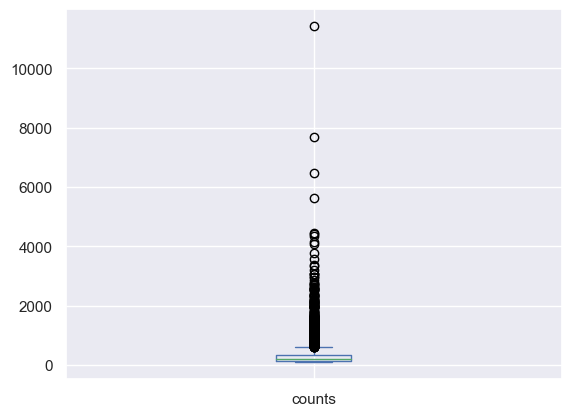

In [63]:
# histrogram is not work for visualizasion, thus we use boxplot
df_Contributor_ID_edit_morethan_100['counts'].plot.box()
plt.show()



In [64]:
# Calculate logarithm to 
# base 10 on 'counts' column
df_Contributor_ID_edit_morethan_100['logarithm_base10'] = np.log10(df_Contributor_ID_edit_morethan_100['counts'])

/var/folders/d3/1p34hjc12rd76_cpm1hdhh0r0000gn/T/ipykernel_8760/4205016002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Contributor_ID_edit_morethan_100['logarithm_base10'] = np.log10(df_Contributor_ID_edit_morethan_100['counts'])


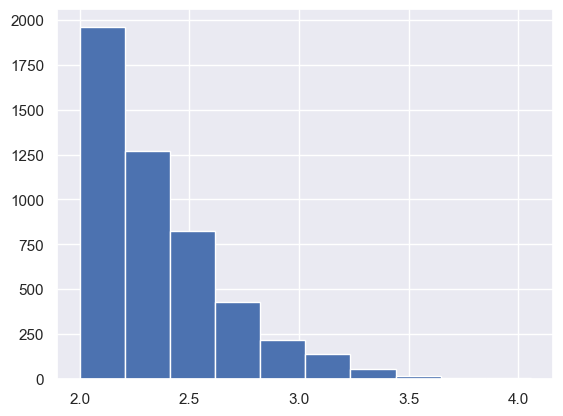

In [65]:
plt.hist(df_Contributor_ID_edit_morethan_100['logarithm_base10'])
plt.show()

In [66]:
# select rows which contain the Contributor ID in "list_Contributor_ID_edit_morethan_100"
df_edited_100 = df_concat[df_concat["Contributor ID"].isin(list_Contributor_ID_edit_morethan_100)]
df_edited_100

,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
1,36395541,1163 in Norway,508027004,2012-08-18 19:54:13,508734,Hmains
2,36395541,1163 in Norway,531466940,2013-01-05 16:35:35,6655086,Dawynn
3,36395541,1163 in Norway,531520594,2013-01-05 22:37:54,1368779,PamD
4,36395541,1163 in Norway,640868107,2015-01-03 23:41:40,1951353,Waacstats
8,36395541,1163 in Norway,830706564,2018-03-16 13:37:34,14965160,Marcocapelle
...,...,...,...,...,...,...
4757087,2913415,Epilaeliocattleya,313371711,2009-09-12 14:26:11,1951353,Waacstats
4757093,2913415,Epilaeliocattleya,329695914,2009-12-04 17:20:51,82835,Rich Farmbrough
4757095,2913415,Epilaeliocattleya,355151347,2010-04-10 15:17:05,1951353,Waacstats
4757100,2913415,Epilaeliocattleya,811933521,2017-11-24 21:52:39,245519,Choess


In [67]:
len(df_edited_100['Page ID'].unique())

9639

## Construct features

In [68]:
# Now your dataset is df_edited_100
df_edited_100.info(null_counts=True)

/var/folders/d3/1p34hjc12rd76_cpm1hdhh0r0000gn/T/ipykernel_8760/1422499724.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_edited_100.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562394 entries, 1 to 4757102
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Page ID           1562394 non-null  object        
 1   Page title        1562394 non-null  object        
 2   Revision ID       1562394 non-null  object        
 3   Timestamp         1562394 non-null  datetime64[ns]
 4   Contributor ID    1562394 non-null  object        
 5   Contributor name  1562394 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 83.4+ MB


### Ratio
* The ratio between the number of edits and the number of days a contributor has been on Wikipedia from the very first edit
* We know that there are 4913 contributor IDs which have made more than 100 edits.
* We know that there are 9639 page IDs in current data

In [69]:
list_ids = list(df_edited_100["Contributor ID"].unique())

In [70]:
# Create new dataframe to store only the Contributor ID and their feature
df_features = pd.DataFrame(list_ids, columns =["Contributor ID"])
df_features

,Contributor ID
0,508734
1,6655086
2,1368779
3,1951353
4,14965160
...,...
4907,15651808
4908,8841302
4909,33109980
4910,33683215


In [71]:
# find Ratio feature
def cal_ratio_feature(list_ids, df_edited_100):
    ratio_list = []
    
    for id in list_ids:
        # find the most recent date from Contributor ID
        latest_time = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].max()
        # find the least recent date from Contributor ID
        earliest_time = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].min()
        # find the number of days a contributor has been on Wikipedia from the very first edit
        num_days = (latest_time - earliest_time).days

        # find the number of edits
        num_edits = len(df_edited_100[df_edited_100["Contributor ID"] == id])

        if num_days == 0:
            num_days = -1

        # append the ratio value from each id into the list of ratio
        ratio_list.append(num_edits/num_days)

    return ratio_list

In [72]:
# 12m 43.1s
ratio_feature_list = cal_ratio_feature(list_ids, df_edited_100)
ratio_feature_list

[0.4731457800511509,
 0.04581110762472545,
 0.0641321044546851,
 0.23747152619589978,
 0.31016042780748665,
 0.36553136050623486,
 0.04223908140250154,
 0.27419651056014693,
 0.7809924601087147,
 0.059049447911665866,
 0.0935562652639489,
 0.03826488537027874,
 0.35729149991996156,
 0.10743675708625419,
 0.25281775619906366,
 0.2366881217086015,
 0.10413223140495868,
 0.10121457489878542,
 0.20289522058823528,
 0.3030579643998174,
 0.25984049395420633,
 0.2622913847541723,
 0.13821138211382114,
 0.13373737373737374,
 0.20200214515552378,
 0.626715205824699,
 0.06726149622512011,
 0.09736180904522614,
 0.14236902050113895,
 0.15844544095665172,
 0.04841954022988506,
 0.09334233018443545,
 0.07125231338679827,
 0.03570172353148083,
 0.1268637195919435,
 0.21213569039655997,
 0.04647819837086727,
 0.07487832272557095,
 0.06364513018322084,
 0.03835035652341492,
 0.0405766150560598,
 0.08187357197258187,
 0.07897513187641296,
 0.1366272326606356,
 0.3578826237054085,
 0.14830789648307896,


In [73]:
df_features["Ratio"] = ratio_feature_list
df_features

,Contributor ID,Ratio
0,508734,0.473146
1,6655086,0.045811
2,1368779,0.064132
3,1951353,0.237472
4,14965160,0.310160
...,...,...
4907,15651808,0.181001
4908,8841302,0.413127
4909,33109980,1.557851
4910,33683215,1.746544


In [79]:
#df_features[df_features['Ratio'] > 10]

,Contributor ID,Ratio
764,21096845,68.000000
4071,20784002,171.000000
4559,5272799,10.027778
4584,42578760,32.600000
4759,4694396,46.333333
4814,3171666,61.500000
4815,6456316,21.500000
4832,5185194,22.857143
4887,18654415,11.500000
4891,25916950,14.727273


In [81]:
df_features['Ratio'].describe()

count    4912.000000
mean        0.292128
std         3.049157
min         0.013944
25%         0.042600
50%         0.079654
75%         0.162243
max       171.000000
Name: Ratio, dtype: float64

In [82]:
# see the row that provide max ratio
df_features.sort_values(by='Ratio', ascending=False)

,Contributor ID,Ratio
4071,20784002,171.000000
764,21096845,68.000000
4814,3171666,61.500000
4903,10461035,49.000000
4759,4694396,46.333333
...,...,...
4223,37985,0.016022
3258,1104,0.015592
1794,40487,0.015272
695,6627,0.014671


## Mean_gap & Max_gap
* The average gap between two consecutive posts measured in days
* Max_gap is a measure about the longest period of inactivity between two successive posts.

In [90]:
# find Mean_gap and Max_gap features
def cal_Mean_and_Max_gap_feature(list_ids, df_edited_100):
    mean_gap_list = []
    max_gap_list = []
    
    for id in list_ids:
        # find average gap between two consecutive posts measured in days
        mean_gap = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].sort_values().diff().mean()

        # find the max gap between two consecutive polsts measured in days
        max_gap = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].sort_values().diff().max()

        # add to list
        mean_gap_list.append(mean_gap.days)
        max_gap_list.append(max_gap.days)

    return mean_gap_list, max_gap_list

In [91]:
# 21m 2.4s
# caluculate mean_gap and max_gap features
mean_gap_feature_list, max_gap_feature_list = cal_Mean_and_Max_gap_feature(list_ids, df_edited_100)
mean_gap_feature_list


[2,
 21,
 15,
 4,
 3,
 2,
 23,
 3,
 1,
 16,
 10,
 26,
 2,
 9,
 3,
 4,
 9,
 9,
 4,
 3,
 3,
 3,
 7,
 7,
 4,
 1,
 14,
 10,
 7,
 6,
 20,
 10,
 14,
 28,
 7,
 4,
 21,
 13,
 15,
 26,
 24,
 12,
 12,
 7,
 2,
 6,
 6,
 14,
 23,
 6,
 3,
 11,
 6,
 20,
 7,
 12,
 31,
 4,
 3,
 1,
 3,
 6,
 9,
 8,
 1,
 5,
 48,
 3,
 5,
 2,
 14,
 16,
 3,
 25,
 11,
 48,
 2,
 15,
 25,
 5,
 2,
 7,
 2,
 1,
 4,
 9,
 11,
 15,
 12,
 7,
 31,
 10,
 11,
 19,
 3,
 9,
 5,
 1,
 14,
 0,
 51,
 4,
 2,
 24,
 4,
 9,
 5,
 30,
 6,
 3,
 5,
 28,
 5,
 2,
 6,
 6,
 10,
 60,
 4,
 47,
 29,
 4,
 22,
 5,
 14,
 46,
 8,
 0,
 3,
 21,
 41,
 4,
 6,
 3,
 17,
 16,
 12,
 30,
 7,
 11,
 13,
 12,
 4,
 23,
 6,
 23,
 8,
 2,
 3,
 3,
 7,
 8,
 8,
 3,
 3,
 3,
 18,
 11,
 21,
 37,
 3,
 0,
 2,
 3,
 24,
 9,
 14,
 37,
 2,
 2,
 10,
 9,
 13,
 23,
 6,
 2,
 3,
 20,
 28,
 11,
 13,
 11,
 26,
 15,
 8,
 2,
 23,
 8,
 10,
 13,
 17,
 9,
 16,
 52,
 3,
 41,
 8,
 3,
 14,
 3,
 2,
 30,
 2,
 4,
 37,
 5,
 6,
 20,
 20,
 1,
 3,
 17,
 1,
 7,
 34,
 7,
 4,
 3,
 1,
 11,
 2,
 9,
 3,
 8,
 39,
 3,


In [92]:
max_gap_feature_list

# !!!!!the result must not be negative

[223,
 456,
 252,
 2036,
 66,
 273,
 338,
 347,
 217,
 1653,
 334,
 563,
 419,
 451,
 94,
 103,
 355,
 582,
 316,
 98,
 73,
 246,
 127,
 151,
 217,
 947,
 423,
 178,
 65,
 127,
 310,
 2547,
 415,
 566,
 137,
 207,
 392,
 1008,
 649,
 716,
 535,
 563,
 745,
 124,
 54,
 228,
 152,
 3197,
 677,
 509,
 137,
 242,
 994,
 387,
 404,
 412,
 1331,
 87,
 1287,
 68,
 90,
 264,
 576,
 1433,
 374,
 355,
 547,
 162,
 394,
 74,
 303,
 678,
 2071,
 1098,
 1164,
 546,
 121,
 672,
 2916,
 345,
 440,
 137,
 328,
 174,
 355,
 100,
 99,
 284,
 633,
 245,
 350,
 737,
 114,
 233,
 223,
 127,
 745,
 1332,
 337,
 17,
 2039,
 1085,
 104,
 391,
 381,
 144,
 184,
 1546,
 107,
 223,
 88,
 985,
 95,
 76,
 640,
 507,
 713,
 2023,
 2084,
 1854,
 800,
 100,
 392,
 300,
 408,
 355,
 844,
 25,
 1574,
 551,
 1627,
 150,
 121,
 881,
 695,
 401,
 1484,
 491,
 822,
 697,
 298,
 200,
 415,
 1441,
 124,
 1326,
 1306,
 71,
 237,
 724,
 2070,
 180,
 203,
 907,
 143,
 657,
 239,
 339,
 748,
 558,
 159,
 91,
 44,
 2244,
 1476,
 

In [93]:
df_features["Mean_gap"] = mean_gap_feature_list
df_features["Max_gap"] = max_gap_feature_list
df_features

,Contributor ID,Ratio,Mean_gap,Max_gap
0,508734,0.473146,2,223
1,6655086,0.045811,21,456
2,1368779,0.064132,15,252
3,1951353,0.237472,4,2036
4,14965160,0.310160,3,66
...,...,...,...,...
4907,15651808,0.181001,5,415
4908,8841302,0.413127,2,24
4909,33109980,1.557851,0,44
4910,33683215,1.746544,0,41


In [94]:
# Export this dataframe to .csv file
df_features.to_csv("/Users/thanawitouioutai/IFN704/Code_project_analysis/Dataframe_features_after35pages.csv", index = None)

In [98]:
df_features_stat = df_features.iloc[:,1:].describe()
df_features_stat

,Ratio,Mean_gap,Max_gap
count,4912.000000,4912.000000,4912.000000
mean,0.292128,15.773616,656.813314
std,3.049157,12.853832,673.255245
min,0.013944,0.000000,0.000000
25%,0.042600,6.000000,208.000000
50%,0.079654,12.000000,430.000000
75%,0.162243,23.000000,850.250000
max,171.000000,72.000000,5061.000000


In [111]:
# Export this dataframe to .csv file
df_features_stat.to_csv("/Users/thanawitouioutai/IFN704/Code_project_analysis/Dataframe_features_after35pages_stat.csv")

In [101]:
# select features
df_select_features = df_features.iloc[:,1:]
df_select_features


,Ratio,Mean_gap,Max_gap
0,0.473146,2,223
1,0.045811,21,456
2,0.064132,15,252
3,0.237472,4,2036
4,0.310160,3,66
...,...,...,...
4907,0.181001,5,415
4908,0.413127,2,24
4909,1.557851,0,44
4910,1.746544,0,41


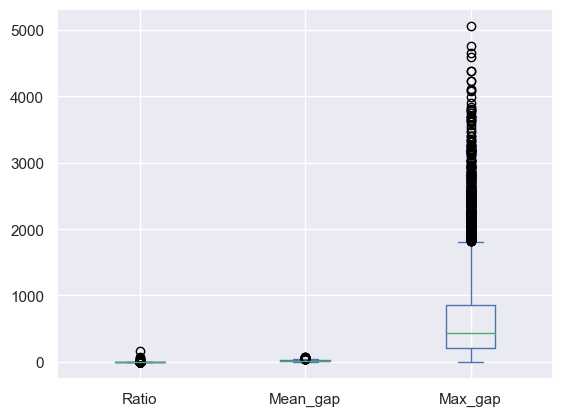

In [102]:
# boxplot
df_select_features.plot.box()
plt.show()

## Normalization section

In [153]:
df_features

,Contributor ID,Ratio,Mean_gap,Max_gap
0,508734,0.473146,2,223
1,6655086,0.045811,21,456
2,1368779,0.064132,15,252
3,1951353,0.237472,4,2036
4,14965160,0.310160,3,66
...,...,...,...,...
4907,15651808,0.181001,5,415
4908,8841302,0.413127,2,24
4909,33109980,1.557851,0,44
4910,33683215,1.746544,0,41


In [154]:
# normalise data in to range (0,1)
df_select_features = df_features.iloc[:,1:]

d = preprocessing.normalize(df_select_features)
scaled_df = pd.DataFrame(d, columns=df_select_features.columns)
scaled_df

,Ratio,Mean_gap,Max_gap
0,0.002122,0.008968,0.999958
1,0.000100,0.046004,0.998941
2,0.000254,0.059419,0.998233
3,0.000117,0.001965,0.999998
4,0.004695,0.045407,0.998958
...,...,...,...
4907,0.000436,0.012047,0.999927
4908,0.017152,0.083033,0.996399
4909,0.035384,0.000000,0.999374
4910,0.042560,0.000000,0.999094


In [155]:
# show stat of df_features_normalised
df_features_normalised_stat = scaled_df.describe()

# Export this dataframe to .csv file
df_features_normalised_stat.to_csv("/Users/thanawitouioutai/IFN704/Code_project_analysis/Dataframe_features_after35pages_normalised_stat.csv")
df_features_normalised_stat

,Ratio,Mean_gap,Max_gap
count,4912.000000,4912.000000,4912.000000
mean,0.007490,0.034539,0.995673
std,0.064597,0.027389,0.049647
min,0.000003,0.000000,0.000000
25%,0.000057,0.014745,0.998756
50%,0.000172,0.027201,0.999592
75%,0.000702,0.047386,0.999871
max,1.000000,0.180185,1.000000


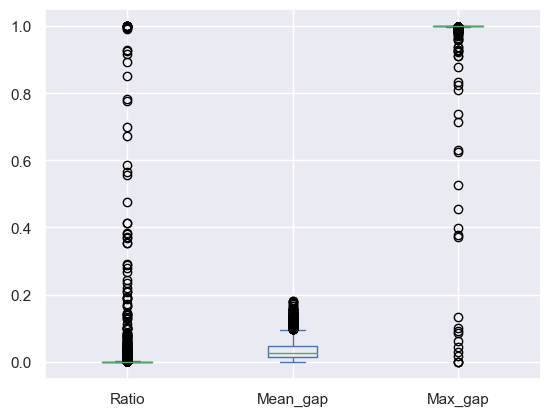

In [156]:
# boxplot
scaled_df.plot.box()
plt.show()

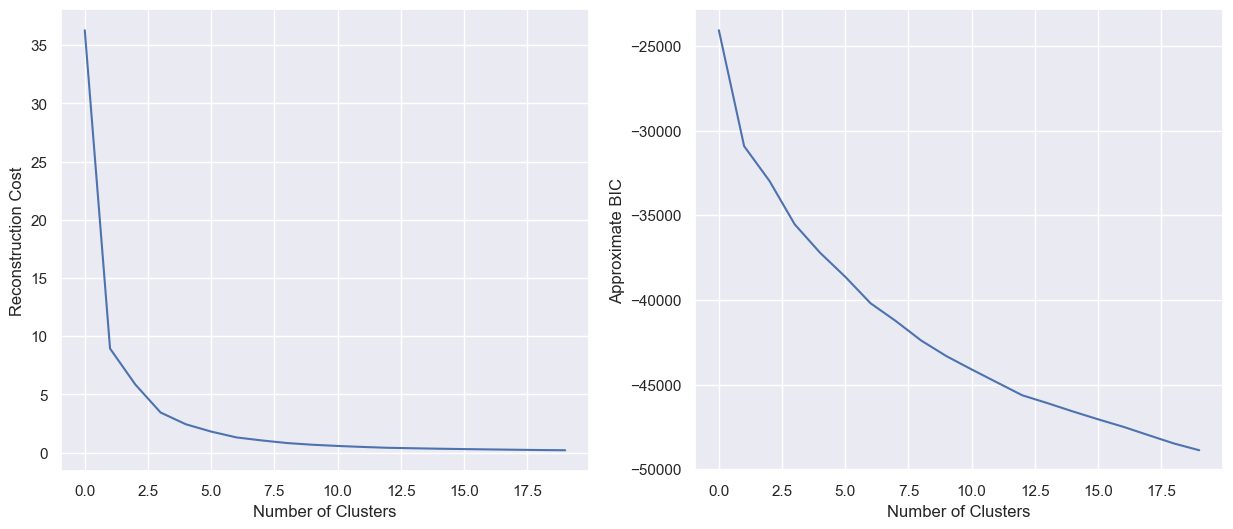

In [157]:
# find optimal k from elbow
num_itts = 10

costs = []
approx_bic = []
for i in range(20):
    c = 0
    a_b = 0
    for r in range(num_itts):
        kmeans = KMeans(n_clusters=i+1, random_state=r).fit(scaled_df)

        c += kmeans.inertia_

        k = np.shape(kmeans.cluster_centers_)[0]*(np.shape(kmeans.cluster_centers_)[1] + 1)
        m = len(scaled_df)        
        a_b += m*np.log(kmeans.inertia_ / m) + k*np.log(m)

    costs.append(c / num_itts)
    approx_bic.append(a_b / num_itts)

fig = plt.figure(figsize=[15, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(costs)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Reconstruction Cost');  

ax = fig.add_subplot(1, 2, 2)
ax.plot(approx_bic)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Approximate BIC');  

In [158]:
# kmean
kmeans = KMeans(n_clusters=3, random_state=2022).fit(scaled_df)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 2.36907305e-03  3.48080839e-02  9.98936669e-01]
 [ 9.67925363e-01 -6.93889390e-18  1.68456412e-01]
 [ 4.43469676e-01  0.00000000e+00  8.74237718e-01]]
[0 0 0 ... 0 0 0]


In [159]:
# get cluster
nor_clusters = kmeans.predict(scaled_df)
nor_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [160]:
data_with_clusters = scaled_df.copy()
data_with_clusters["Cluster"] = nor_clusters 
data_with_clusters.insert(loc=0, column='Contributor ID', value=df_features.iloc[:,0])
data_with_clusters



,Contributor ID,Ratio,Mean_gap,Max_gap,Cluster
0,508734,0.002122,0.008968,0.999958,0
1,6655086,0.000100,0.046004,0.998941,0
2,1368779,0.000254,0.059419,0.998233,0
3,1951353,0.000117,0.001965,0.999998,0
4,14965160,0.004695,0.045407,0.998958,0
...,...,...,...,...,...
4907,15651808,0.000436,0.012047,0.999927,0
4908,8841302,0.017152,0.083033,0.996399,0
4909,33109980,0.035384,0.000000,0.999374,0
4910,33683215,0.042560,0.000000,0.999094,0


In [180]:
data_with_clusters[data_with_clusters['Mean_gap']==0]

,Contributor ID,Ratio,Mean_gap,Max_gap,Cluster
99,603177,0.079257,0.0,0.996854,0
127,8163010,0.140165,0.0,0.990128,0
161,7852030,0.017770,0.0,0.999842,0
259,922466,0.775484,0.0,0.631367,2
330,7826393,0.279723,0.0,0.960081,2
...,...,...,...,...,...
4901,1072406,0.019249,0.0,0.999815,0
4902,23317666,0.023198,0.0,0.999731,0
4903,10461035,1.000000,0.0,0.000000,1
4909,33109980,0.035384,0.0,0.999374,0


In [162]:
# Export this dataframe to .csv file
data_with_clusters.to_csv("/Users/thanawitouioutai/IFN704/Code_project_analysis/Dataframe_features_after35pages_normalised_with_cluster.csv", index=None)

In [163]:
data_with_clusters['Cluster'].value_counts()

0    4874
2      22
1      16
Name: Cluster, dtype: int64

In [138]:
# use for count the number of clusters
data_with_clusters[data_with_clusters["Cluster"]==0].iloc[:,1:4].describe()

,Ratio,Mean_gap,Max_gap
count,4874.000000,4874.000000,4874.000000
mean,0.002369,0.034808,0.998937
std,0.012589,0.027324,0.001848
min,0.000003,0.000000,0.975360
25%,0.000056,0.015036,0.998806
50%,0.000171,0.027393,0.999596
75%,0.000670,0.047545,0.999874
max,0.220617,0.180185,1.000000


In [139]:
data_with_clusters[data_with_clusters["Cluster"]==1].iloc[:,1:4].describe()

,Ratio,Mean_gap,Max_gap
count,16.000000,16.0,16.000000
mean,0.967925,0.0,0.168456
std,0.048553,0.0,0.186284
min,0.851112,0.0,0.000000
25%,0.927286,0.0,0.026114
50%,0.995971,0.0,0.089626
75%,0.999643,0.0,0.374343
max,1.000000,0.0,0.524985


In [141]:
data_with_clusters[data_with_clusters["Cluster"]==2].iloc[:,1:4].describe()

,Ratio,Mean_gap,Max_gap
count,22.000000,22.0,22.000000
mean,0.443470,0.0,0.874238
std,0.171343,0.0,0.107442
min,0.235555,0.0,0.624695
25%,0.305658,0.0,0.826478
50%,0.382992,0.0,0.923749
75%,0.562945,0.0,0.951711
max,0.780869,0.0,0.971861


Ignore standardization. Now you will use normalisation
Next, focus on plot 2D 3 plots

2D Plot

In [189]:
df_scatter = data_with_clusters.iloc[:,1:]
df_scatter

,Ratio,Mean_gap,Max_gap,Cluster
0,0.002122,0.008968,0.999958,0
1,0.000100,0.046004,0.998941,0
2,0.000254,0.059419,0.998233,0
3,0.000117,0.001965,0.999998,0
4,0.004695,0.045407,0.998958,0
...,...,...,...,...
4907,0.000436,0.012047,0.999927,0
4908,0.017152,0.083033,0.996399,0
4909,0.035384,0.000000,0.999374,0
4910,0.042560,0.000000,0.999094,0


In [193]:
df_scatter['Cluster'] = df_scatter['Cluster'].astype(str)
df_scatter['Cluster']

0       0
1       0
2       0
3       0
4       0
       ..
4907    0
4908    0
4909    0
4910    0
4911    0
Name: Cluster, Length: 4912, dtype: object

<AxesSubplot: xlabel='Ratio', ylabel='Mean_gap'>

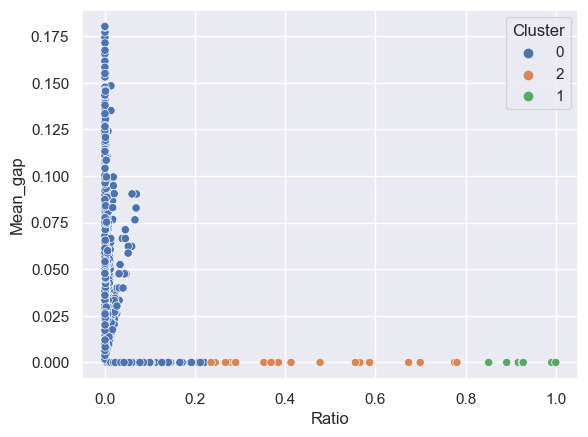

In [204]:
sns.scatterplot(x="Ratio", y="Mean_gap", data=df_scatter, hue="Cluster")

<AxesSubplot: xlabel='Ratio', ylabel='Max_gap'>

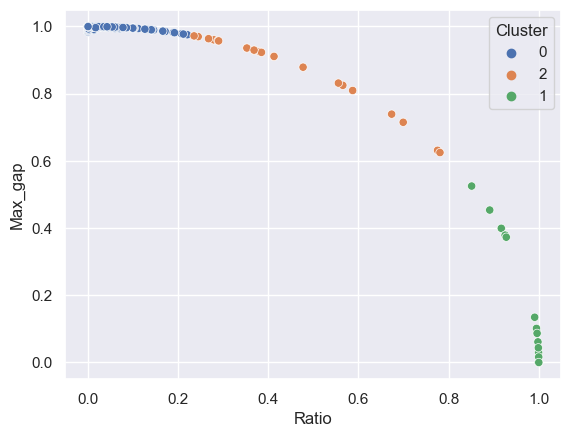

In [212]:
sns.scatterplot(x="Ratio", y="Max_gap", data=df_scatter, hue="Cluster")

<AxesSubplot: xlabel='Mean_gap', ylabel='Max_gap'>

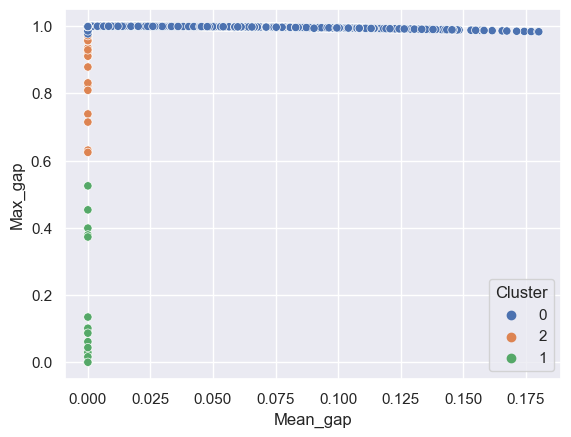

In [213]:
sns.scatterplot(x="Mean_gap", y="Max_gap", data=df_scatter, hue="Cluster")